Bagging Classifier Results:
Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       160
           1       0.85      0.88      0.87       140

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300


Boosting Classifier Results:
Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       160
           1       0.81      0.88      0.84       140

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



c:\Program Files\python\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


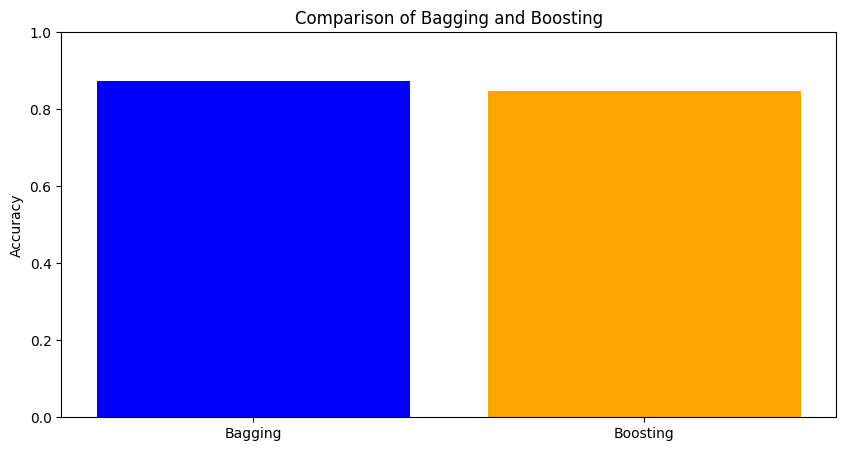

In [14]:
#code 1
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Generate a synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, 
                           n_redundant=5, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Bagging with Decision Tree Classifier
bagging_model = BaggingClassifier(n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)
bagging_predictions = bagging_model.predict(X_test)

# Print Bagging results
print("Bagging Classifier Results:")
print(f"Accuracy: {accuracy_score(y_test, bagging_predictions):.2f}")
print(classification_report(y_test, bagging_predictions))

# Boosting with AdaBoost Classifier (use default base estimator)
boosting_model = AdaBoostClassifier(n_estimators=50, random_state=42)
boosting_model.fit(X_train, y_train)
boosting_predictions = boosting_model.predict(X_test)

# Print Boosting results
print("\nBoosting Classifier Results:")
print(f"Accuracy: {accuracy_score(y_test, boosting_predictions):.2f}")
print(classification_report(y_test, boosting_predictions))

# Visualize the results
plt.figure(figsize=(10, 5))
plt.bar(['Bagging', 'Boosting'], [accuracy_score(y_test, bagging_predictions), 
                                    accuracy_score(y_test, boosting_predictions)], 
        color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Comparison of Bagging and Boosting')
plt.ylim(0, 1)
plt.show()


Bagging Classifier Results:
Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       160
           1       0.85      0.88      0.87       140

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300


Boosting Classifier Results:
Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       160
           1       0.81      0.88      0.84       140

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



c:\Program Files\python\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


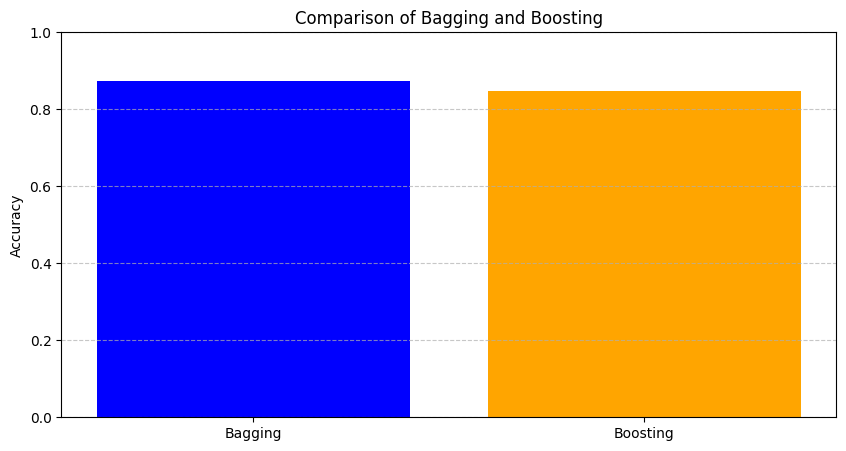

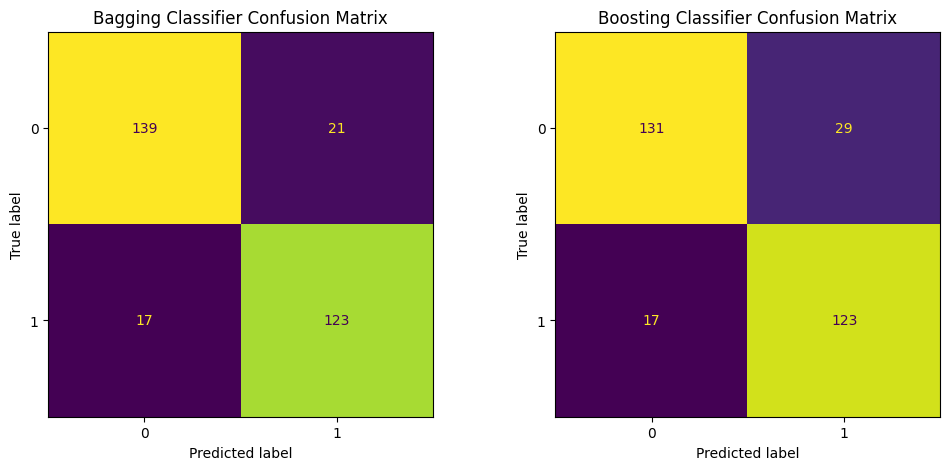

In [16]:
#code 2
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Generate a synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, 
                           n_redundant=5, random_state=42)

# Split the dataset into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Bagging with Decision Tree Classifier
bagging_model = BaggingClassifier(DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)
bagging_predictions = bagging_model.predict(X_test)

# Print Bagging results
print("Bagging Classifier Results:")
print(f"Accuracy: {accuracy_score(y_test, bagging_predictions):.2f}")
print(classification_report(y_test, bagging_predictions))

# Boosting with AdaBoost Classifier (use default base estimator)
boosting_model = AdaBoostClassifier(n_estimators=50, random_state=42)
boosting_model.fit(X_train, y_train)
boosting_predictions = boosting_model.predict(X_test)

# Print Boosting results
print("\nBoosting Classifier Results:")
print(f"Accuracy: {accuracy_score(y_test, boosting_predictions):.2f}")
print(classification_report(y_test, boosting_predictions))

# Visualize the results with a bar chart
plt.figure(figsize=(10, 5))
plt.bar(['Bagging', 'Boosting'], [accuracy_score(y_test, bagging_predictions), 
                                    accuracy_score(y_test, boosting_predictions)], 
        color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Comparison of Bagging and Boosting')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualize confusion matrices for both models
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion Matrix for Bagging
cm_bagging = confusion_matrix(y_test, bagging_predictions)
ConfusionMatrixDisplay(cm_bagging).plot(ax=axes[0], colorbar=False)
axes[0].set_title('Bagging Classifier Confusion Matrix')

# Confusion Matrix for Boosting
cm_boosting = confusion_matrix(y_test, boosting_predictions)
ConfusionMatrixDisplay(cm_boosting).plot(ax=axes[1], colorbar=False)
axes[1].set_title('Boosting Classifier Confusion Matrix')

plt.show()